# A first look at perturbation theory

## Overview:
- **Teaching:** 30 min
- **Exercises:** 5 min

**Questions**
- What is perturbation theory?
- In what regard is the infinite well a rare case in the world of quantum physics?
- How can I apply perturbation theory to find energies?

**Objectives**
- Understand that we can describe complex systems in terms of simpler ones.
- Have a grasp of Dirac notation.
- Visualise the effect of a square perturbation on the infinite well.
- Understand why a central perturbation affects some quantum states more than others. 

## Information: Import necessary libraries and set constants
For this section, we will be making use of the `quad` function from the `scipy.integrate` library to find the values of integrals. We will use this alongside the libraries which we have previously imported. We will also assign values to the variables defining the infinite square well so that we can easily use them later.

In [1]:
#------------------------import libraries-----------------------#

import numpy as np #probably gonna need it!
import matplotlib.pyplot as plt  #for plotting purposes
from scipy.integrate import quad  #for integration


#------------------------define constants-----------------------#

m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt
hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi

L = 10**(-10) #width of the infinite well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * L #width of the central square perturbation

## Time-independent non-degenerate perturbation theory

The infinite potential well is one of a few examples of quantum systems which have exact solutions to the Schrödinger equation. However, for the vast majority of systems, approximate solutions must be found using perturbation theory, which is widely regarded as one of the most useful results of quantum mechanics. It uses mathematical methods to describe the Hamiltonian of a complex system in terms of a much simpler one, for which an exact solution has been found. 

It is assumed that the Hamiltonian operator of the complex system can be expressed as 

$$
\hat{H} = \hat{H}_{0} + \hat{H}^{'} \ ,
\tag{1}
$$

where $\hat{H}$ is the Hamiltonian of the simple, 'unperturbed' system. We assume that we know the solutions of $\hat{H}_{0}\bigl|\psi_{0n}\bigl> = E_{0n}\bigl|\psi_{0n}\bigl>.$ That is, we know the eigenvalues and complete set of eigenfunctions belonging to the Hamiltonian $\hat{H}_{0}$. $\hat{H}^{'}$ represents an additional energy term, which acts as a “perturbation” on the system described by $\hat{H}_{0}$. We assume this additional energy term is small in comparison to $\hat{H}_{0}$. $\hat{H}^{'}$ could, for example, describe the effect of a small central square perturbation in the infinite potential well. 

To describe the perturbed system, we look for solutions of $\hat{H}\bigl|\psi_{n}\bigl> = E_{n}\bigl|\psi_{n}\bigl>$ in the form

$$
E_{n} = E_{0n} + \lambda E_{1n} + \lambda^{2}E_{2n} + ...
\tag{2}
$$

$$
\bigl|\psi_{n}\bigl> = \bigl|\psi_{0n}\bigl> + \lambda\bigl|\psi_{1n}\bigl> + \lambda^{2}\bigl|\psi_{2n}\bigl> + ...,
\tag{3}
$$

where $E_{0n}$ and $|\psi_{0n}\bigl>$ are the energy and wavefunction of the unperturbed system. The number in the subscripts of the energies and wavefunctions respresent the order of the corection to the system. For example, $E_{1n}$ represents the first-order correction to the energy. Substituting into the equation and equating powers of $\lambda$ we find solutions of the form,

$$
E_{n} = E_{0n} + \bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl> + \sum_{k\neq n}\frac{\bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0k}\bigl> \bigl<\psi_{0k}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>}{E_{0n} - E_{0k}} + ...
\tag{4}
$$

$$ 
\bigl|\psi_{n}\bigl> = \bigl|\psi_{0n}\bigl> + \sum_{k\neq n}\frac{\bigl<\psi_{0k}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>}{E_{0n} - E_{0k}}\bigl|\psi_{0k}\bigl> + ...
\tag{5}
$$

## An example - Square perturbation in an infinite well
### Energy

Firstly we will consider how perturbation theory can be applied to find the correction to the energy of a system. As an example, we will consider a 1D infinite potential well of width $a$ with a potential 'bump' at its centre, of height $V$ and covering one fifth of the width of the well. Before we investigate the effects of this perturbaion on the energy of the system, we will look at the energy of the 'unperturbed' system, which is described by equation 5 in the first chapter. 

Before we begin, make sure that the `psi` function which we made previously is already in the notebook as we will need it later on. Also ensure that all constants, such as the width of the well, remain because we will be using them again.

Now, we will plot a graph of the energy of the unperturbed system against the principle quantum number, $n$. To do this, we will use a similar approach to that in previous chapters:

- create a function to calculate the energy
- fill an empty array with values of the energy for increasing quantum number, $n$
- generate an array of quantum numbers using the function `linspace`
- plot the two arrays alongside each other

Copy and paste the following functions into your Jupyter notebook and you will see a smooth curve. As expected from the equation for energy, we see that the energy is proportional to the square of the principle quantum number.

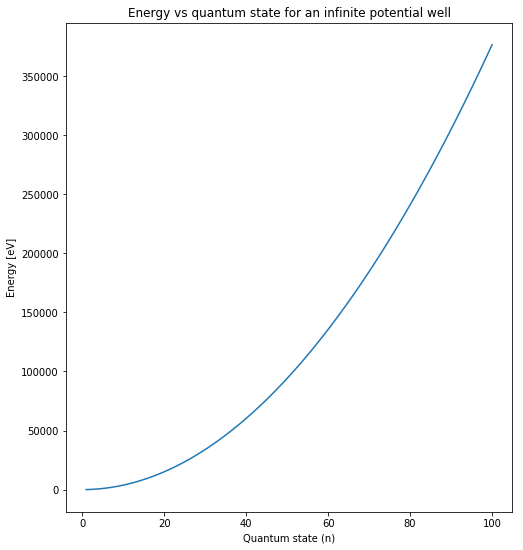

In [2]:
def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle in joules
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy

def energy_spectrum(nmax):
    """
    Function to find energy of the system in eV for various quantum states
    
    Returns:
        E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    E = np.empty(nmax)
    
    for i in range(0, nmax):
        E[i] = energy(i + 1) / e
    
    return E

def plot_energy(nmax):
    """
    Function to plot energy against the quantum state
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #create the figure and set its size
    fig, ax = plt.subplots(1, figsize = (8, 9))    
        
    #general plot formatting
    ax.plot(n, energy_spectrum(nmax))
    
    ax.set_xlabel('Quantum state (n)')
    ax.set_ylabel('Energy [eV]')
    ax.set_title('Energy vs quantum state for an infinite potential well')
    return plt.show()

plot_energy(100)

Now we want to find the first-order correction to the energy of the system. We will use equation 4, and therefore we need to know the wavefunction of the unperturbed system, which we have found previously as

$$
\psi_{0n}(x) = \sqrt\frac{2}{L}\sin\biggl(\frac{n\pi x}{L}\biggl).
\tag{6}
$$

From equation 4, we know that the first-order correction to the energy of the system is $E_{1n} = \bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>$. Dirac notation is very confusing when first encountered so we will write this equation in a simpler form

$$
\bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl> = \int_{x}\psi^{*}V\psi dx,
\tag{7}
$$

where $\psi^{*}$ is the complex conjugate of the wavefunction. Substituting equation 6 into here we find

$$
E_{1n} = \frac{2}{L} \int_{0.4L}^{0.6L}\sin\biggl(\frac{n\pi x}{L}\biggl)V\sin\biggl(\frac{n\pi x}{L}\biggl)dx
\tag{8}
$$

$$
E_{1n} = V \biggl(0.2 - \frac{\sin(1.2n\pi) - sin(0.8n\pi)}{2n\pi}\biggl)
\tag{9}
$$

We will now write some lines of code to illustrate the meaning of this equation in real terms. Below is a codeblock containing four functions, which relate to each other to calculate the first-order correction to the energy and then plot the new energy over a range of quantum states with a plot of the unperturbed energy for comparison. The purpose of each function is as follows:
1. Define the wavefunction, as we use it to find the total perturbed energy
2. Find the total energy of the infinite well with a central square perturbation
3. Find the total energy for different quantum states
4. Plot the total energy against quantum state

You will notice that there is a function within the first function, which defines the integrand. The `quad` function identifies the argument of a function as the variable which it will integrate with respect to. For this reason, the function you are integrating should only have one argument as all other variables in the function are assumed to be constant. Note also that the `quad` function has two outputs contained in a list - the value of the integral and the estimated absolute error in the value of the integral. In this case we are only interested in the value of the integral.

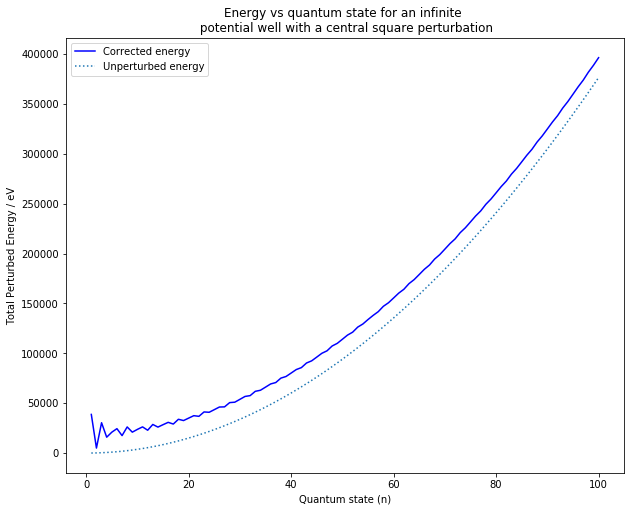

In [3]:
def unperturbed(n, x):
    """
    Function to calculate the value of the wavefunction at a given point in the infinite potential well 
    without any perturbation
    
    Returns:
        psi : float
              the value of the wavefunction
        
    Parameters:
        n : integer
            the order of the wavefunction
            
        x : float
            the position of the particle in the infinite potential well
    """
    
    psi = A * np.sin((n * np.pi * x) / L) #the solution to the unperturbed wavefunction in an infinite potential well
    return psi

def firstperturb(n, V, w):
    """
    Function to calulate the first-order perturbation in the energy of a particle in the infinite potential well
    
    Returns:
        perturb_eV : float
                     the first order perturbation in eV
    
    Parameters:
        w : float
            the width of the square perturbation
            
        V : float
            the magnitude of the square perturbation
            
        n : integer
            the principal quantum number
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (np.sqrt(2 / L) * np.sin((n * np.pi * x) / L)) * (np.conj(np.sqrt(2 / L) * np.sin((n * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        perturb = perturb_1[0] #we want the value of the integral only (not the absolute error)
        return perturb
    
def E_perturbed(n, V, w):
    """
    Function to calulate the total energy of a particle in the infinite potential well with a central
    square perturbation using first-order perturbation theory
    
    Returns:
        perturb_eV : float
                     the first order perturbation in eV
    
    Parameters:
        n : integer
            the principal quantum number
            
        V : float
            the magnitude of the square perturbation in  eV
            
        w : float
            width of the perturbation
    """
    
    total_E = (energy(n) + firstperturb(n, V, w)) / e
    return total_E
    

def E_perturbed_spectrum(V, w):
    """
    Function to find total perturbed energy of the system for various quantum states
    
    Returns:
        new_E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the square perturbation
    """
    new_E = np.empty(nmax)
    
    for i in range(0, nmax):
        new_E[i] = E_perturbed(i + 1, V, w)
    
    return new_E

def plot_E_perturbed(V, w):
    """
    Function to plot total perturbed energy against the quantum state alongside the unperturbed energy.
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
        
        V : float
            magnitude of the square perturbation in eV
               
        w : float
            width of the square perturbation
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #set the size of the figures
    fig, ax = plt.subplots(1, figsize = (10, 8))
    
    ax.plot(n, E_perturbed_spectrum(V, w), 'b', label = 'Corrected energy')
    ax.plot(n, energy_spectrum(nmax), ':', label = 'Unperturbed energy')
    ax.legend(loc = 'best')
    ax.set_xlabel('Quantum state (n)')
    ax.set_ylabel('Total Perturbed Energy / eV')
    ax.set_title('Energy vs quantum state for an infinite \n potential well with a central square perturbation')

    return plt.show()

nmax = 100
plot_E_perturbed(100000*e, w)

As you can see, there is hardly a difference between the two energy spectrums for low perturbation magnitudes. This changes, however, as we increase the perturbation magnitude. It is important not to make the perturbation magnitude too great, particularly for lower quantum states, because perturbation theory will begin to break down. This is because we assumed that $\hat{H}^{'}$ was small in comparison to $\hat{H}_{0}$ when we derived equations for the first order correction to the energy.

## Exercise 1: Energy correction for different states

If you have made the perturbation very large, you may have noticed that the energy appears to oscillate for lower quantum states - let's investigate this! 

Plot the first-order energy correction against the perturbation magnitude for different quantum states. Can you explain why the perturbation seems to affect odd quantum states more than even ones (think about the position of the perturbation and the probability distribution)?

[solution](02_ipw_PT_energy-soln.ipynb)

## Solution: Energy correction for different states

Below is a function which outputs an array containing the first order correction to the energy for different perturbation magnitudes. We then plot the energy correction against the perturbation magnitude. The dashed lines below represent the energy correction for states with an odd quantum and the red solid lines are for states with even quantum numbers. We have therefore opted not to use a legend but this could easily be included by adding the line `ax.legend(loc = 'best')` and adding labels to each line.

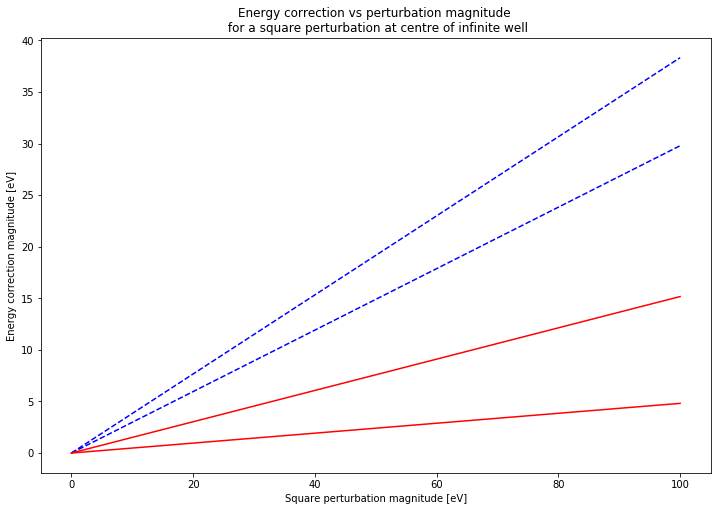

In [4]:
def delta_E(n, Vmax, w):
    """
    Function to return the first order energy correction (in eV) for different 
    square perturbation magnitudes
    
    Returns:
        delta : array
                contains the first order energy corrections over different square 
                perturbation magnitudes
            
    Parameters:
        w : float
            width of the square perturbation
        
        Vmax : float
               the maximum square perturbation. first order energy corrections will be 
               calculated up to this magnitude
               
        n : integer
            the principle quantum number
    """
    
    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    else: 
        delta = np.empty(NV)
    
        for v in range(0, NV):
            delta[v] = firstperturb(n, v * Vstep, w) / e
    
        return delta

Vmax = 100 * e #the maximum perturbation magnitude we will sample
NV = 100 #number of perturbation magnitudes we'll sample
Vstep = Vmax / NV #increment in perturbation magnitude

delta_V = np.linspace(0, Vmax, NV)

fig, ax = plt.subplots(1, figsize = (12, 8))

ax.plot(delta_V / e, delta_E(1, Vmax, w), 'b--')
ax.plot(delta_V / e, delta_E(2, Vmax, w), 'r')
ax.plot(delta_V / e, delta_E(3, Vmax, w), 'b--')
ax.plot(delta_V / e, delta_E(4, Vmax, w), 'r')
ax.set_xlabel('Square perturbation magnitude [eV]')
ax.set_ylabel('Energy correction magnitude [eV]')
ax.set_title('Energy correction vs perturbation magnitude \n for a square perturbation at centre of infinite well')

plt.show()

## Solution:

You will notice that the energy of states with odd quantum numbers are affected by the perturbation more than even states. This is because the position of the perturbation is at the centre of the well and it does not cover a large amount of the well (only a fifth of it). For odd quantum states, there is a much higher probability of the particle existing at the centre of the well than for even quantum states as we saw on our plots of the probability distribution earlier. A central perturbation therefore affects these states more.

For higher quantum states, the difference in the effect of the perturbation on odd and even states reduces because the probability distribution oscillates so frequently, making the probability distribution between different states less distinguishable.